In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("zomato.csv", encoding='latin-1')

In [5]:
cu = df['Cuisines']
No_of_Cuisines = cu.apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0)

In [6]:
df['No_of_Cuisines'] = No_of_Cuisines

In [7]:
ht = df['Has Table booking']
ho = df['Has Online delivery']
isd = df['Is delivering now']
sm = df['Switch to order menu']

In [8]:
boolen_ht = ht.astype(str).replace({'Yes': 1, 'No': 0}).astype(int)
boolen_ho = ho.astype(str).replace({'Yes': 1, 'No': 0}).astype(int)
boolen_isd = isd.astype(str).replace({'Yes': 1, 'No': 0}).astype(int)
boolen_sm = sm.astype(str).replace({'Yes': 1, 'No': 0}).astype(int)

In [9]:
columns_to_drop = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']
df.drop(columns_to_drop, axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Price range           9551 non-null   int64  
 13  Aggregate rating      9551 non-null   float64
 14  Rating color          9551 non-null   object 
 15  Rating text          

In [11]:
df['Has Table booking'] = boolen_ht
df['Has Online delivery'] = boolen_ho
df['Is delivering now'] = boolen_isd
df['Switch to order menu'] = boolen_sm

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Price range           9551 non-null   int64  
 13  Aggregate rating      9551 non-null   float64
 14  Rating color          9551 non-null   object 
 15  Rating text          

In [13]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,No_of_Cuisines,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.0
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748,2.063658,0.121244,0.256622,0.003560,0.0
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145,1.094072,0.326428,0.436792,0.059561,0.0
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000,1.000000,0.000000,0.000000,0.000000,0.0
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000,2.000000,0.000000,0.000000,0.000000,0.0
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000,3.000000,0.000000,1.000000,0.000000,0.0
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000,8.000000,1.000000,1.000000,1.000000,0.0


In [14]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
No_of_Cuisines          0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
dtype: int64

In [15]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Price range,Aggregate rating,Rating color,Rating text,Votes,No_of_Cuisines,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,3,4.8,Dark Green,Excellent,314,3,1,0,0,0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,3,4.5,Dark Green,Excellent,591,1,1,0,0,0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,4,4.4,Green,Very Good,270,4,1,0,0,0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,4,4.9,Dark Green,Excellent,365,2,0,0,0,0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,4,4.8,Dark Green,Excellent,229,2,1,0,0,0


In [16]:
df.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Price range,Aggregate rating,Rating color,Rating text,Votes,No_of_Cuisines,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,3,4.1,Green,Very Good,788,1,0,0,0,0
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,3,4.2,Green,Very Good,1034,3,0,0,0,0
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,4,3.7,Yellow,Good,661,2,0,0,0,0
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,4,4.0,Green,Very Good,901,1,0,0,0,0
9550,5927402,Walter's Coffee Roastery,208,ÛÁstanbul,"CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...",Moda,"Moda, ÛÁstanbul",29.026016,40.984776,Cafe,...,2,4.0,Green,Very Good,591,1,0,0,0,0


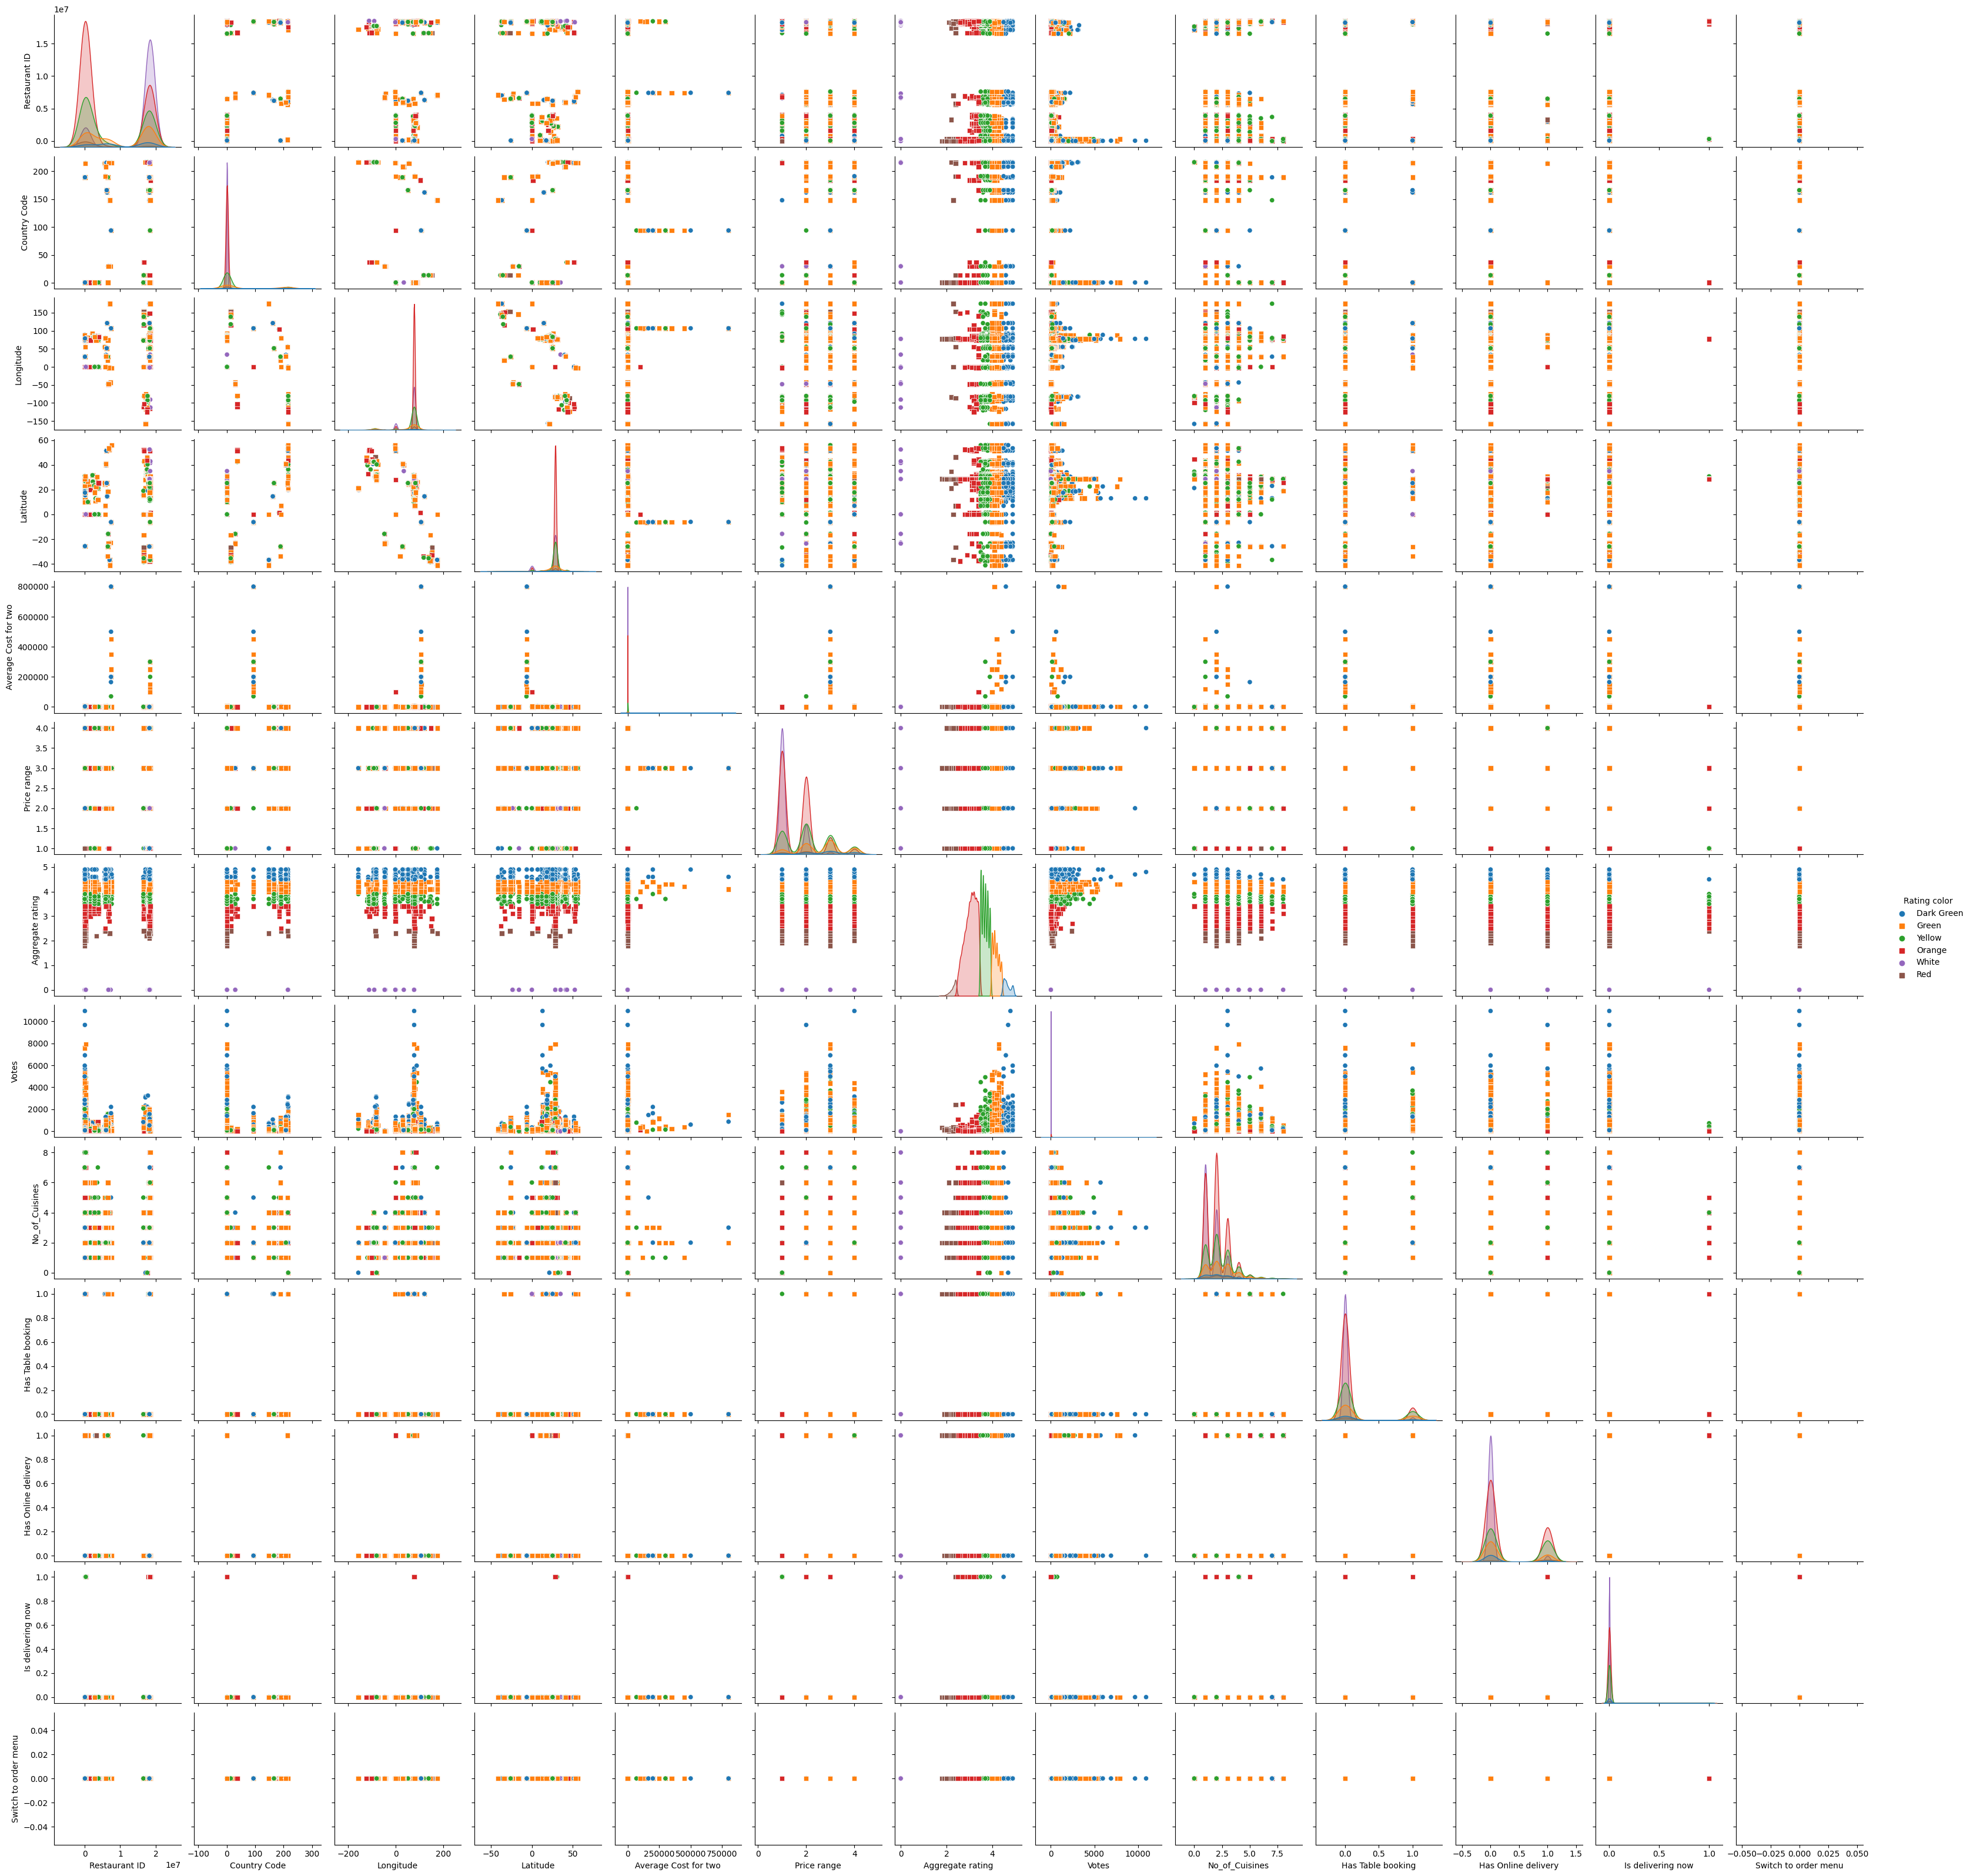

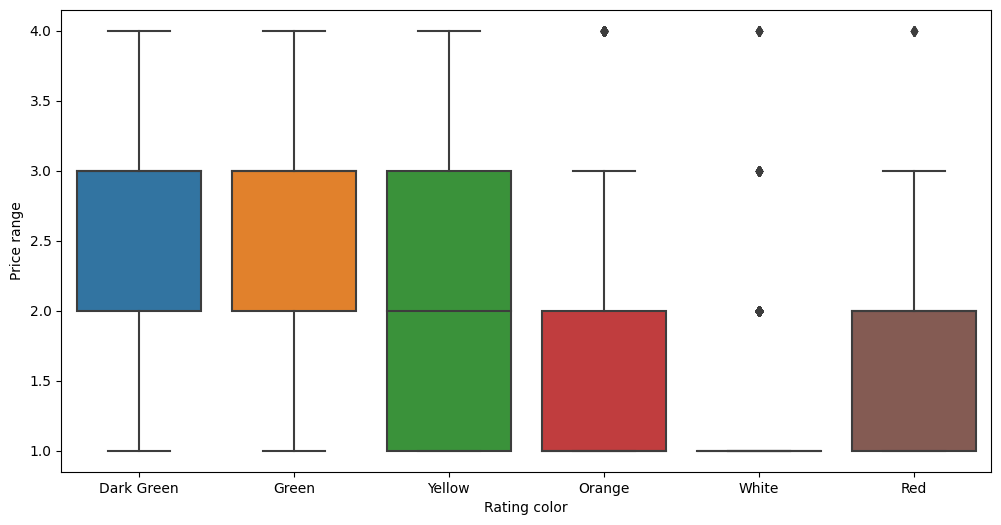

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Outcome' is your target column
sns.pairplot(df, hue='Rating color', markers=["o", "s"])

# Assuming 'Rating' and 'Price' are numeric columns you want to plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Rating color', y='Price range', data=df)

plt.show()


                      Restaurant ID  Country Code  Longitude  Latitude   
Restaurant ID              1.000000      0.148471  -0.226081 -0.052081  \
Country Code               0.148471      1.000000  -0.698299  0.019792   
Longitude                 -0.226081     -0.698299   1.000000  0.043207   
Latitude                  -0.052081      0.019792   0.043207  1.000000   
Average Cost for two      -0.001693      0.043225   0.045891 -0.111088   
Price range               -0.134540      0.243327  -0.078939 -0.166688   
Aggregate rating          -0.326212      0.282189  -0.116818  0.000516   
Votes                     -0.147023      0.154530  -0.085101 -0.022962   
No_of_Cuisines            -0.075517      0.005966   0.018077 -0.029464   
Has Table booking         -0.110071     -0.061682   0.100488  0.054658   
Has Online delivery       -0.085089     -0.154605   0.178757  0.118722   
Is delivering now          0.012548     -0.018291   0.018787  0.015001   
Switch to order menu            NaN   

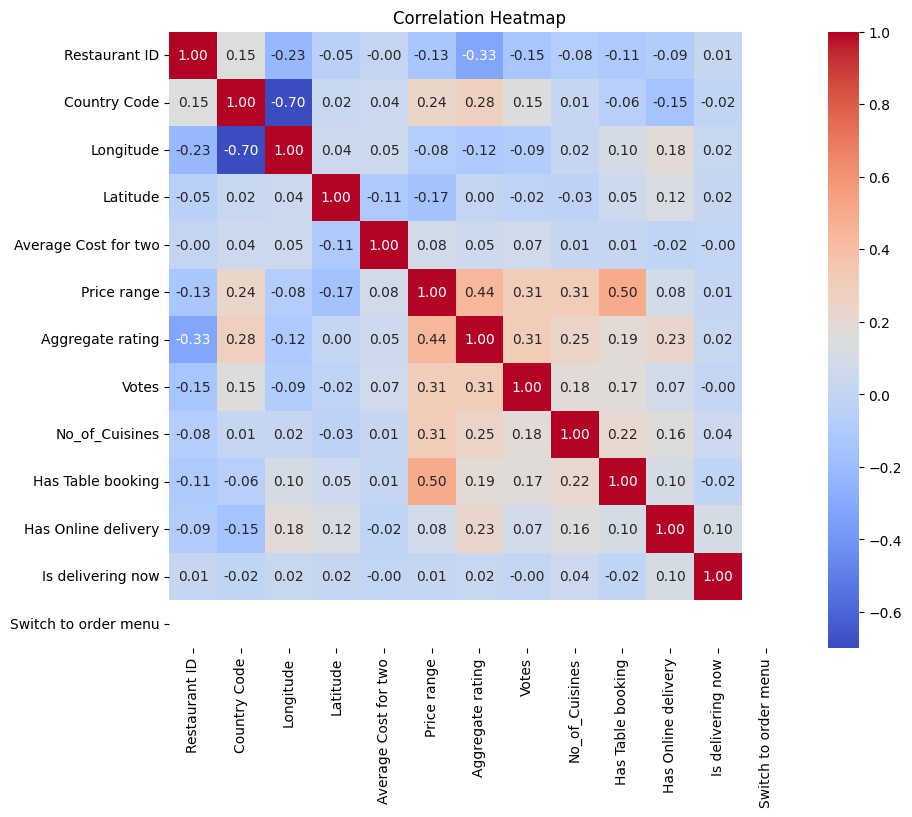

In [19]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64','int32'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

# Generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Select relevant features (X) and target variable (y)
features = ['Restaurant ID', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu','Average Cost for two', 'Price range']
X = df[features]
y = df['Votes']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Feature Engineering: Create polynomial features
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Standardize features
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

# Initialize and train the Linear regression model
model = LinearRegression()
model.fit(X_train_poly_scaled, y_train)

# Predicting on the testing set
y_pred = model.predict(X_test_poly_scaled)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


Mean Squared Error: 171402.47672450638
R-squared Score: 0.13437100460277496


In [ ]:
import statsmodels.api as sm

# Assuming 'X' and 'y' are your features and target variable respectively
X = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(y, X).fit()  # Fit the ordinary least squares (OLS) model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Votes   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     199.0
Date:                Fri, 16 Feb 2024   Prob (F-statistic):          7.50e-240
Time:                        15:10:12   Log-Likelihood:                -70908.
No. Observations:                9551   AIC:                         1.418e+05
Df Residuals:                    9544   BIC:                         1.419e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -53.9800 